In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats
import os

In [2]:
datapath = os.path.join(os.getcwd(), "data", "1_f=.1")

In [3]:
w = np.zeros((1000, 1000))
for i, file in enumerate(sorted(os.listdir(datapath))):
    w[:, i] = np.sort(np.load(os.path.join(datapath, file)))

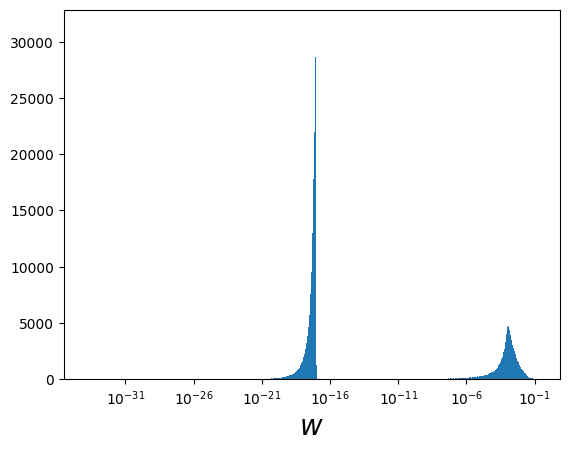

In [4]:
a = w.reshape(-1)
# a = a[a>1e-17]
fig, ax1 = plt.subplots()


hist, bins = np.histogram(a, bins=2000)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
  

ax1.hist(a, bins=logbins)

ax1.set_xscale('log')

ax1.set_xlabel('$w$', fontsize=20)

plt.show();

In [18]:
hist = np.histogram(a, bins=1000)
hist_dist = scipy.stats.rv_histogram(hist, density=False)

X = np.linspace(-.001, 1.0, 1000)

fig, ax = plt.subplots()

ax.set_title("PDF from Template")

ax.plot(X, 1 - hist_dist.cdf(X), label='CDF')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()

fig.show()


NameError: name 'a' is not defined

In [7]:
datapath = os.path.join(os.getcwd(), "data")

f_set = [0.0, .05, .1, .3, .5]

wealths = {f: [] for f in f_set}

for f in f_set:
    wealths[f] = np.load(os.path.join(datapath, 'w_f={:.2f}.npy'.format(f)))
    wealths[f] = wealths[f].reshape(-1)


/tmp/ipykernel_17946/4196412991.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


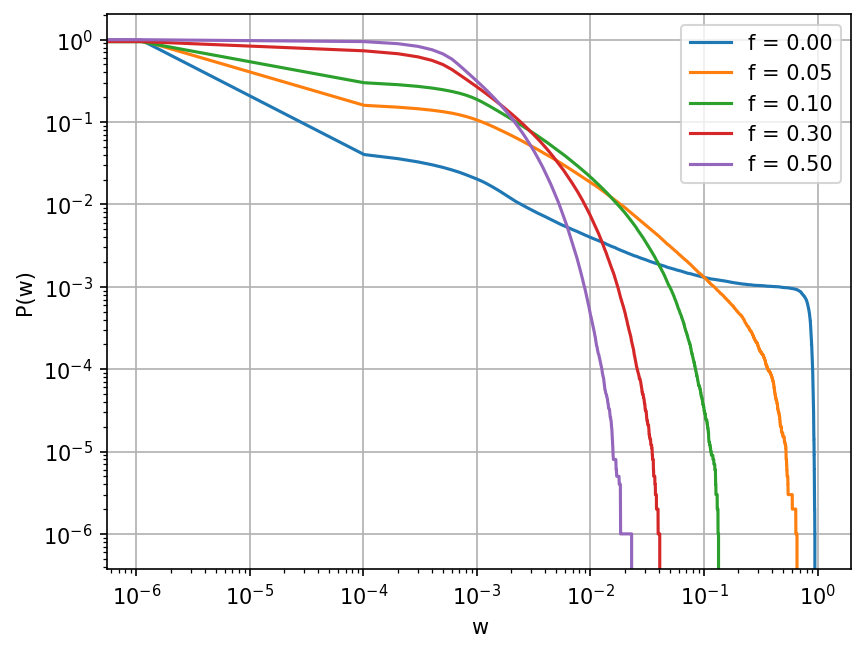

In [24]:
X = np.linspace(-.001, 1.0, 10000)

fig, ax = plt.subplots(dpi=150)

# ax.set_title("PDF from Template")
for f in f_set:
    hist = np.histogram(wealths[f], bins=10000)
    hist_dist = scipy.stats.rv_histogram(hist, density=False)
    ax.plot(X, 1 - hist_dist.cdf(X), label='f = {:.2f}'.format(f))


ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('w')
ax.set_ylabel('P(w)')
ax.legend()
ax.grid()
fig.show()

In [6]:
f_set = [0.0, .1, .2, .3, .4, .5]
wealths = {}

for f in f_set:
    file = os.path.join(os.getcwd(), 'data', '2_10kAgents', f'w_f={f:.2f}.npy')
    wealths[f] = np.load(file)
    wealths[f] = np.sort(wealths[f][wealths[f]>3e-17])
    
wealths[0].shape

(853480,)

In [7]:
wealths[0.5].shape

(10000000,)

In [8]:
a = np.sort(np.reshape(wealths[0], -1))
print(a.shape)

csum = np.cumsum(a)
csum.shape

(853480,)


(853480,)

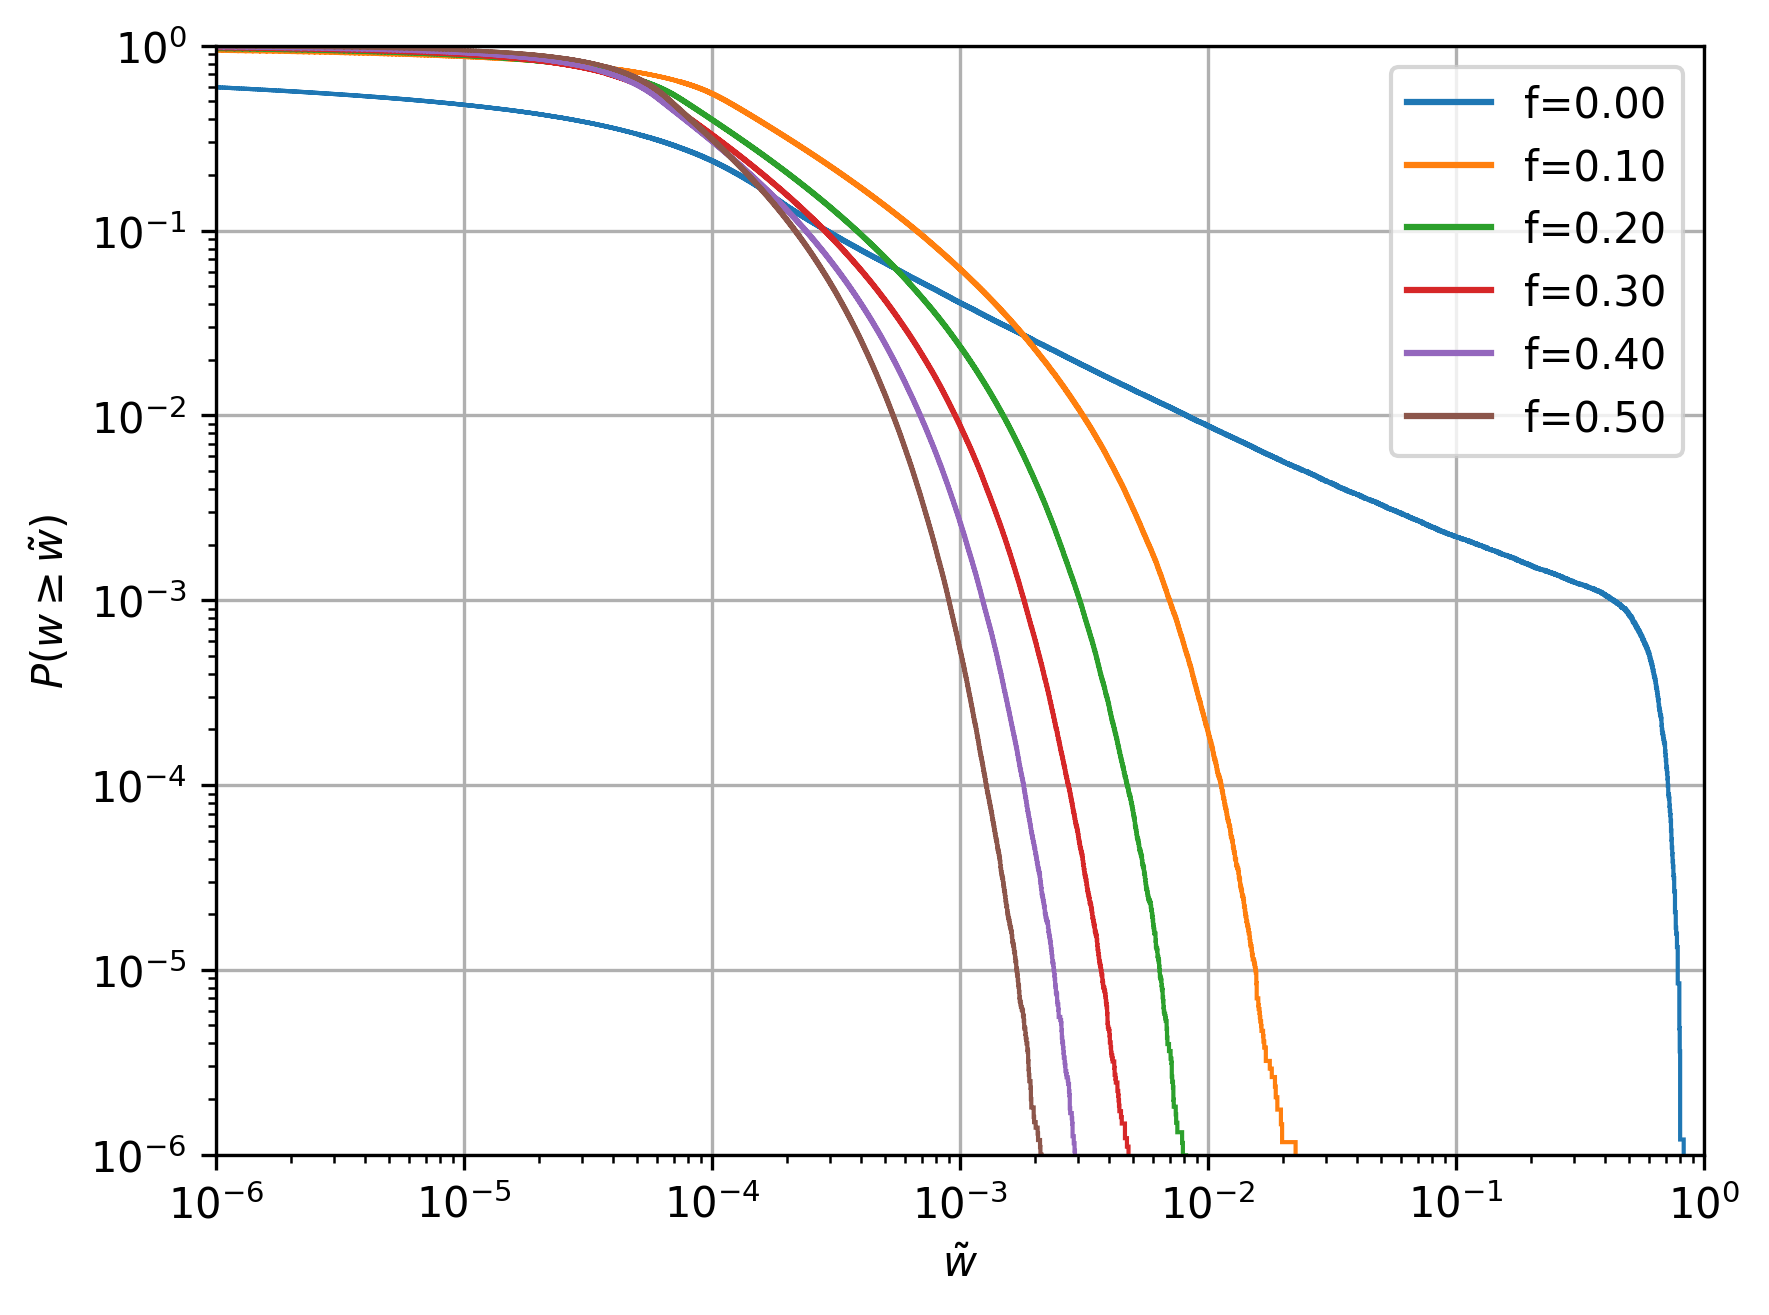

In [33]:
from matplotlib.lines import Line2D

fig, ax = plt.subplots(dpi=300)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim(1e-6, 1e-0)
ax.set_ylim(1e-6, 1)

for f in f_set:
    ax.hist(
        wealths[f],
        bins=np.logspace(start=-15, stop=1, num=10000),
        density=True,
        histtype="step",
        cumulative=-1,
        label=f"f={f:.2f}",
    )

# Create new legend handles but use the colors from the existing ones
handles, labels = ax.get_legend_handles_labels()
new_handles = [Line2D([], [], c=h.get_edgecolor()) for h in handles]

ax.set_xlabel("$\~w$")
ax.set_ylabel("$P(w\geq\~w)$")
ax.legend(handles=new_handles, labels=labels)
ax.grid()

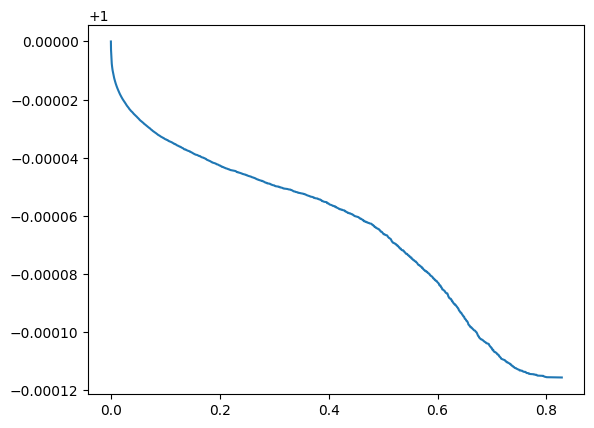

In [51]:
plt.plot(a, 1 - csum)